In [1]:
import tensorflow as tf 
import os 

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gp, True)

In [3]:
import cv2
import imghdr

In [4]:
data_dir = r"C:\Users\"

In [5]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [6]:
os.listdir(data_dir)

['Ferrari', 'Mercedes']

In [7]:
#Removing Weird Images 

for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list{}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}. format(image_path)')

In [8]:
#Loading data
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [9]:
import numpy as np 
from matplotlib import pyplot as plt

In [10]:
data = tf.keras.preprocessing.image_dataset_from_directory(r'C:\Users\')

Found 156 files belonging to 2 classes.


In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
# Get another batch from the iterator
batch = data_iterator.next()

In [13]:
#Class 1 = Mercedes
#Class 2 = Ferrari
batch[1]

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0])

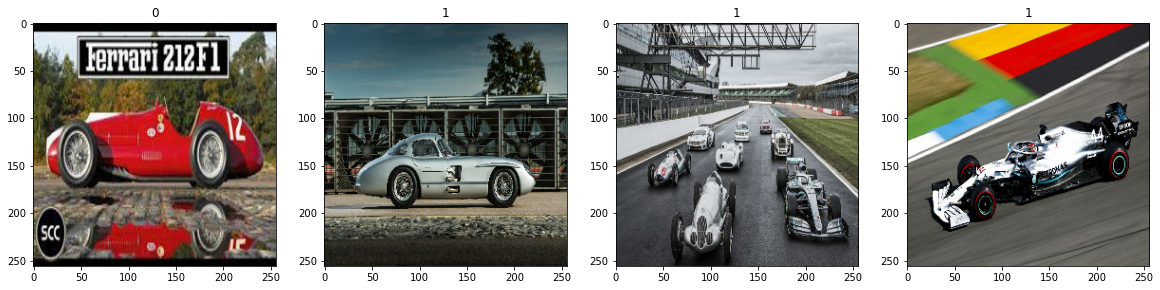

In [14]:
fix, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [15]:
#PreProcessing the Data 
data = data.map(lambda x,y: (x/255, y))

In [16]:
scaled_iterator = data.as_numpy_iterator()

In [17]:
batch = scaled_iterator.next()

In [18]:
batch[0].max()

1.0

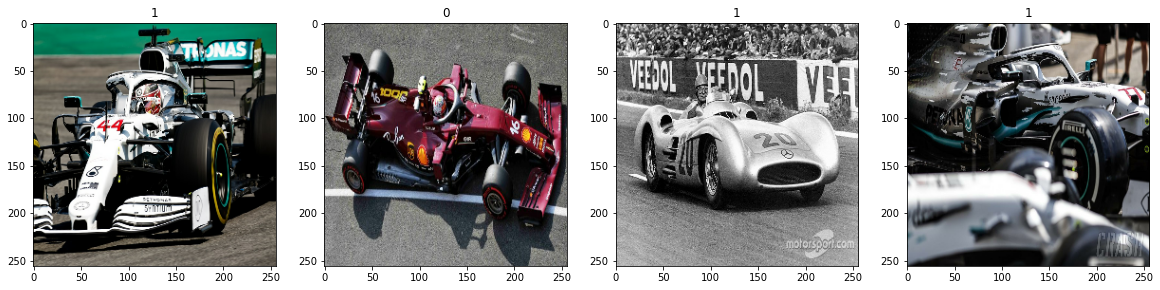

In [19]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [20]:
len(data)

5

In [21]:
#split Data into Training and Test DataSets 

train_size = int(len(data)*0.7)-1
val_size = int(len(data)*0.2) + 1
test_size = int(len(data)*0.1 + 1)

In [22]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [23]:
len(test)

1

In [24]:
#Deep Model 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout 

In [25]:
model = Sequential()

In [26]:
#
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation ='sigmoid'))

In [27]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 14400)             0

In [29]:
from tensorflow import keras 

In [30]:
#Training the Model 
logdir = r"C:\Users\Michka\Desktop\F1 Webscraping\ML logs"

In [31]:
# tensorboard_callback = tf.keras.callbacks.Tensorboard(log_dir = logdir)

In [32]:
hist = model.fit(train, epochs = 40, validation_data=val)

Epoch 1/40
2/2 [==============================] - 14s 7s/step - loss: 1.0031 - accuracy: 0.5938 - val_loss: 1.2262 - val_accuracy: 0.3594
Epoch 2/40
2/2 [==============================] - 9s 5s/step - loss: 0.9884 - accuracy: 0.4271 - val_loss: 0.6125 - val_accuracy: 0.6875
Epoch 3/40
2/2 [==============================] - 9s 5s/step - loss: 0.6204 - accuracy: 0.6458 - val_loss: 0.5665 - val_accuracy: 0.6094
Epoch 4/40
2/2 [==============================] - 9s 5s/step - loss: 0.5485 - accuracy: 0.6562 - val_loss: 0.6423 - val_accuracy: 0.5000
Epoch 5/40
2/2 [==============================] - 8s 4s/step - loss: 0.6079 - accuracy: 0.5312 - val_loss: 0.4755 - val_accuracy: 0.6094
Epoch 6/40
2/2 [==============================] - 8s 4s/step - loss: 0.4803 - accuracy: 0.6146 - val_loss: 0.4568 - val_accuracy: 0.5625
Epoch 7/40
2/2 [==============================] - 8s 4s/step - loss: 0.4574 - accuracy: 0.6146 - val_loss: 0.4365 - val_accuracy: 0.8281
Epoch 8/40
2/2 [========================

In [33]:
hist.history

{'loss': [1.1611964702606201,
  0.9736979007720947,
  0.6206573843955994,
  0.5510619282722473,
  0.5811206102371216,
  0.49248313903808594,
  0.43616098165512085,
  0.3956621289253235,
  0.3375856280326843,
  0.2002451866865158,
  0.1835375428199768,
  0.07072646170854568,
  0.14285579323768616,
  0.15453438460826874,
  0.021790005266666412,
  0.04305322468280792,
  0.051183633506298065,
  0.02478291466832161,
  0.07073760032653809,
  0.04915755242109299,
  0.015883293002843857,
  0.039708465337753296,
  0.01290704496204853,
  0.014164360240101814,
  0.016339600086212158,
  0.00217150105163455,
  0.0024765136186033487,
  0.0029211044311523438,
  0.002352252835407853,
  0.002662577899172902,
  0.0010133387986570597,
  0.0008890643366612494,
  0.0006788368336856365,
  0.0007842935738153756,
  0.000629639602266252,
  0.00032978312810882926,
  0.0004959037760272622,
  0.00020424432295840234,
  0.00011852233001263812,
  0.000263187539530918],
 'accuracy': [0.59375,
  0.40625,
  0.640625,
 

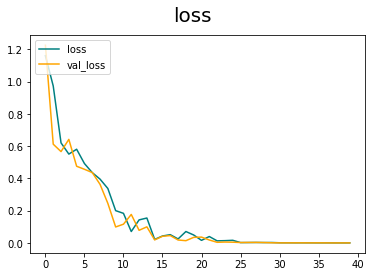

In [34]:
#Plot Performance 
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('loss', fontsize=20)
plt.legend(loc= "upper left")
plt.show()

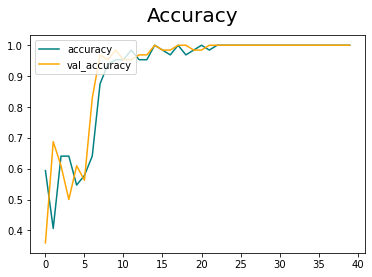

In [35]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc= "upper left")
plt.show()

In [36]:
#Evaluating Performance 
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy 

In [37]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [38]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y,yhat)

In [39]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


In [40]:
#Testing on New Data
import cv2

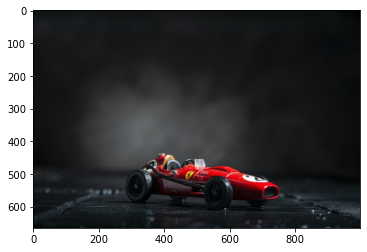

In [42]:
img = cv2.imread(r"C:\Users\Michka\Desktop\F1 Webscraping\ImageClassification\ferraritest.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show() 

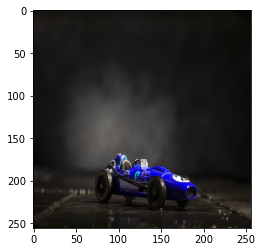

In [43]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [44]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [45]:
yhat = model.predict(np.expand_dims(resize/255,0))

In [46]:
yhat

array([[0.9850657]], dtype=float32)

In [47]:
if yhat > 0.5:
    print(f' Mercedes')
else:
    print(f' Ferrari')

 Mercedes


In [48]:
#Save Model
from tensorflow.keras.models import load_model 

In [49]:
model.save(os.path.join(r"C:\Users\Michka\Desktop\F1 Webscraping\ML Models", 'f1carmodel.h5'))